In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import os
import json
import torch
import numpy as np
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation 
from nerfstudio.utils.eval_utils import eval_setup
from inerf.inerf_trainer import load_data_into_trainer
from inerf.inerf_utils import get_corrected_pose, load_eval_image_into_pipeline

In [10]:
os.chdir('/workspace')
MODEL_PATH = "/workspace/outputs/test_training_data_1/plane-nerf/2024-02-05_192341"
DATA_PATH = "/stored_data/test_one_frame"
GROUND_TRUTH_PATH = os.path.join(DATA_PATH, "ground_truth.json")
TRANSFORM_FILE = "transforms.json"
with open(GROUND_TRUTH_PATH) as f:
    GROUND_TRUTH = json.load(f)
with open(os.path.join(DATA_PATH, TRANSFORM_FILE)) as f:
    TRANSFORM = json.load(f)

In [11]:
config_path = os.path.join(MODEL_PATH, "config.yml")
config, pipeline, _, _ = eval_setup(
                        Path(config_path),
                        test_mode="inference",
                    )

pipeline = load_eval_image_into_pipeline(pipeline,DATA_PATH,TRANSFORM)

config.pipeline.datamanager.pixel_sampler.num_rays_per_batch = 4096

trainer = load_data_into_trainer(
    config,
    pipeline,
    plane_optimizer = False
)
trainer.pipeline.datamanager.KERNEL_SIZE = 7
trainer.pipeline.datamanager.THRESHOLD = 31
trainer.pipeline.datamanager.METHOD = "edge"
trainer.pipeline.datamanager.get_inerf_batch()  

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from 
outputs/test_training_data_1/plane-nerf/2024-02-05_192341/nerfstudio_models/step-000009999.ckpt

Setting up training dataset...

Caching all 1 images.

Output()

[20:52:12] Saving checkpoints to:                                                                         ]8;id=395763;file:///home/user/nerfstudio/nerfstudio/engine/trainer.py\trainer.py]8;;\:]8;id=824657;file:///home/user/nerfstudio/nerfstudio/engine/trainer.py#134\134]8;;\
           outputs/test_training_data_1/plane-nerf/2024-02-05_192341/nerfstudio_models                                  

Loading latest Nerfstudio checkpoint from load_dir...


Done loading Nerfstudio checkpoint from 
outputs/test_training_data_1/plane-nerf/2024-02-05_192341/nerfstudio_models/step-000009999.ckpt

Number of keypoints:  2166
Number of rays:  20321
Reduce the number of rays
Final number of rays:  4096


In [12]:
img, mask = trainer.pipeline.datamanager.setup_rays_inerf(RAYS=trainer.pipeline.datamanager.config.pixel_sampler.num_rays_per_batch, 
                                                         THRESHOLD=trainer.pipeline.datamanager.THRESHOLD, 
                                                         KERNEL_SIZE=trainer.pipeline.datamanager.KERNEL_SIZE,
                                                         METHOD=trainer.pipeline.datamanager.METHOD)

Number of keypoints:  2166
Number of rays:  20321
Reduce the number of rays
Final number of rays:  4096


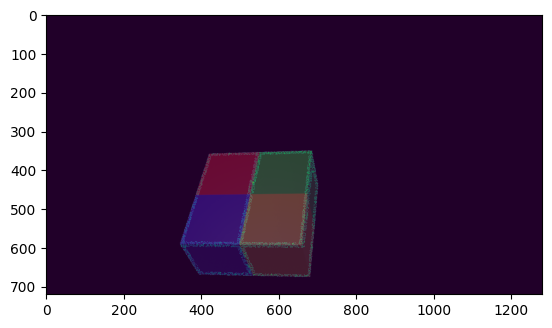

In [13]:
#Plot mask over image
plt.imshow(img)
plt.imshow(mask, alpha=0.5)
plt.show()